Chapter 11: Parallel Axis Plots
===============================

Gnuplot version 5 gained the ability to create *parallel axis plots*.
These are sufficiently dissimilar from gnuplot’s other plot types to
merit their own chapter. Sometimes called “parallel coordinate plots,”
these plots are a way to visualize data in multiple dimensions. They are
rather unusual, and you may never have seen one before. We’ll approach
them by way of some U.S. census data, courtesy of
https://www.census.gov/support/USACdataDownloads.html. We’ve assembled
some data, from different census files, into one data file called
“census.dat”. If you want to play along, and you should, you can find
this file in the usual place—the download area where you can retrieve
copies of this book and all the other supporting material. The file is
in tab-separated-value, or TSV, format; we’ll have to let gnuplot know
about that, so it can read the data into the proper columns.

The file has 3,199 rows: one for each county in the United States, plus
rows for state totals, the U.S. total, and the first row for column
names. We’ve “commented-out” the state total rows and the U.S. total
row. The first column gives the name of the county, but we won’t be
including those names in the plots. The remaining columns give data for
the year 2005, per county; they are, in order, total larcenies, total
murders, total motor vehicle thefts, total robberies, percentage of
people under the age of 18 who do not have health insurance, and the
estimated population as of July of that year.

When exploring a set of data like this, one can start by looking for
trends and associations between quantities, always remembering that, as
the [saying](http://www.tylervigen.com/spurious-correlations) goes,
“correlation does not imply causation.” Let’s pick two columns and make
a scatterplot. We’ll plot motor vehicle thefts *versus* larcenies,
dividing each quantity by the county population, in order to plot rates
rather than raw counts. We’ll make the data points transparent, by using
a color specification with an alpha channel, to create a higher visual
density in regions where many data points overlap. The simple script
that does all this is

    unset key
    set datafile sep tab
    set xlab  "Motor vehicle theft rate"
    set ylab "Larceny rate"
    plot "census.dat" u ($4/$7):($2/$7) pt 7 lc "#e0ff00ff"

There are no new commands here. The result of the script is the figure
below. It may not be surprising that two types of property crime are
pretty highly correlated.

<figure>
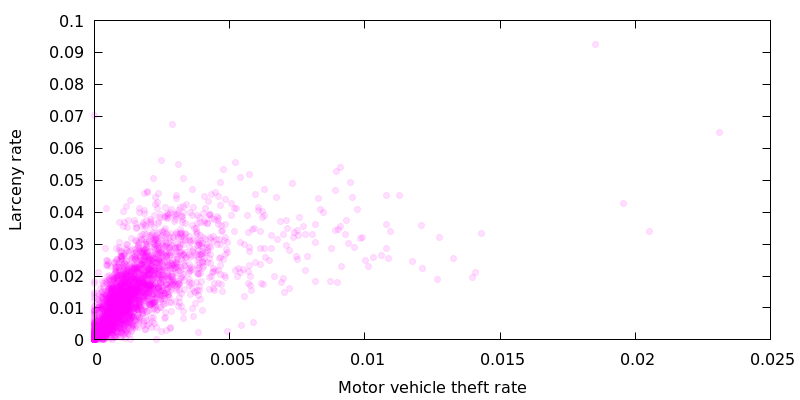<figcaption aria-hidden="true">Scatter plot: two types of property crime</figcaption>
</figure>

We could continue in this fashion, plotting various combinations of
pairs of quantities; essentially looking at 2D slices of the data, which
can be thought of as 3,000 points embedded within a 6D space: one
dimension for each statistical quantity, not including the county name.
We could even encode additional quantities, as we’ve done in some
previous chapters, using dot size or color, perhaps combined with a 3D
perspective plot, to look at more than two dimensions at once. But this
does not treat every dimension the same, encoding some into position,
others into color, etc.

The parallel axis plot is one approach to visualizing multidimensional
data. The principles of its construction are simple, but interpretation
can take practice. For each dimension, the plot has a vertical axis;
these parallel axes are spaced equally, and may or may not feature tics
or labels. For each data point, a line is drawn connecting its values
along each of the axes. Points that are close together in the
multidimensional space will thus lead to lines that are close together,
allowing you to see clusters or associations in the data, or so it is
hoped. These visualizations are probably most effective when the number
of data points is much larger than the number of dimensions, as in our
examples in this chapter. The previous release of gnuplot limited the
maximum number of parallel axes, but that restriction has been removed
in release v.5.4.

New Parallel Axis Syntax
========================

The syntax for parallel axis plotting has been changed in v.5.4 of
gnuplot. This means that existing scripts for parallel axes, written for
v.5.x, $x<4$, will fail. Breaking changes are always regrettable, but in
this case the greater flexibility of the new syntax, and the dropping of
the limitation on the number of axes, required a reworking of the
command. All the scripts in this chapter have been verified on v.5.4,
and will not work on previous versions.

To make a parallel axis plot, use the `with parallel` clause within the
plot command or set the data style with the command
`set style data parallelaxes`. It’s usually best to disable the border
and the default ytics. By default, the parallel axes will be unadorned,
but you can put tics on them if you like. The command for that is the
second highlighted command here. In previous examples we’ve used
gnuplot’s default whitespace separator for data columns, but for this
one our data file uses tabs; we need to tell gnuplot about this, which
is done in the third highlighted command.

Since this data tends to be crowded at low values with a scattering of
high values, it’s helpful to scale the data to spread it out more
uniformly. This is often done with log scaling, but here we defined a
scaling function, `s(x)`, that takes the square root of the data.

Nevertheless, because of the large number of datapoints, the plot is a
nearly uniform mass, and doesn’t convey much insight. We’ll try to
handle this problem in the following examples.

The final `plot` command has five parts, which gives us the five
parallel axes; for each axis, the corresponding part of the plot command
specifies what to plot there, with the usual `using` syntax. To get
comparable rates, we divide each quantity by column 7, which holds the
population of the particular region. We don’t do this with column 6,
because that number is already recorded as a percentage.

In [ ]:
set style data parallelaxes
unset key
unset border; unset ytics
set paxis 1 tics 5
s(x) = x**.5
set datafile sep tab
set xtics ("%% Minors without HS" 1, "Larceny" 2,"MV Theft" 3,"Robbery" 4, "Murder" 5)
plot "census.dat" u 6, "" u (s($2/$7)), "" u (s($4/$7)), "" u (s($5/$7)), "" u (s($3/$7)) 

One way to deal with too much data is simply to skip some data points.
In this example we make the same plot, but use the `every` command to
only plot every 20<sup>th</sup> point. In addition, we’ve added tics to
the remaining axes. You can use the same tic commands, including the
label offset used in this script, as in `set ytics`, etc. This random
subsample of the data does reveal more structure than the full plot
above, but it would be preferable to find a way to see patterns without
leaving out points, if possible. We’ll return to this shortly.

The `every` clause must be repeated for every column, or else the
current version of gnuplot will segfault.

In [ ]:
set style data parallelaxes
unset key
unset border; unset ytics
set paxis 1 tics 5
set paxis 2 tics .02
set paxis 3 tics .02
set paxis 4 tics .01
set paxis 5 tics .001 offset 5
s(x) = x**.5
set datafile sep tab
set xtics ("%% Minors without HS" 1, "Larceny" 2,\
   "MV Theft" 3,"Robbery" 4, "Murder" 5)
plot "census.dat" u 6 every 20, "" u (s($2/$7)) every 20, "" u (s($4/$7)) every 20,\
    "" u (s($5/$7)) every 20, "" u (s($3/$7)) every 20

Before we return to the issue of revealing structure in the data, it is
sometimes useful to force some of the axes to have their tics’ values
aligned. To do this, give the axes in question the same range and tic
specification. We’ve repeated the previous plot here, forcing the
Larceny and MV Theft axes to be aligned. Note that gnuplot will not
extend a paxis beyond the data, no matter how you set the range and
tics, unlike a normal x- or y-axis. This is why the third axis in this
example plot is shorter than the others.

In [ ]:
set style data parallelaxes
unset key
unset border; unset ytics
set paxis 1 tics 5
set paxis 2 tics .02
set paxis 3 tics .02
set paxis 4 tics .01
set paxis 5 tics .001 offset 5
set paxis 2 range [0: 0.21]
set paxis 3 range [0: 0.21]
s(x) = x**.5
set datafile sep tab
set xtics ("%% Minors without HS" 1, "Larceny" 2,\
    "MV Theft" 3,"Robbery" 4, "Murder" 5) nomirror
plot "census.dat" u 6 every 20, "" u (s($2/$7)) every 20, "" u (s($4/$7)) every 20,\
    "" u (s($5/$7)) every 20, "" u (s($3/$7)) every 20

One way to reveal structure in the data is to color datapoints by value.
We’ve done this in other types of plots, using the `linecolor pal`
clause in the `plot` or `splot` commands. In a parallel axis plot this
will assign colors, taken from the active palette, to the lines
according to the value in an extra column in the `using` clause. In this
example we are coloring the data according to the value on the Larceny
axis, using the default rainbow palette. Notice how this simple coloring
of the data turns the undifferentiated mass of our first parallel axis
plot above into a plot in which we can see some patterns, even though,
as in the first graph, all of the data is plotted. In order for coloring
based on values to work with the new parallel axis syntax, the color
specification must be in the first part of the `plot` command, in the
second field, although it can refer to any columns, as you can see in
the last line of the script below.

In [ ]:
set style data parallelaxes
unset key
unset colorbox
unset border; unset ytics
set paxis 1 tics 5
s(x) = x**.5
set datafile sep tab
set xtics ("%% Minors without HS" 1, "Larceny" 2, "MV Theft" 3,"Robbery" 4, "Murder" 5) nomirror
plot "census.dat" u 6:(s($2/$7)) lc pal, "" u (s($2/$7)), "" u (s($4/$7)), "" u (s($5/$7)), "" u (s($3/$7)) 

Another technique often used with parallel coordinate plots is to take
the data falling within a particular, narrow range along a particular
dimension, and give it a color or another visual attribute that
contrasts with the data outside that range. In this way you can
visualize the data within a narrow slab of dimension N-1 inside the
N-dimensional space. Another useful visualization technique,
particularly useful when plotting many data points, is to make make the
lines partially transparent, allowing you to see behind them. In this
example we use both techniques. First we define two
[linetypes](#setting-top-and-bottom-styles) with rather high
transparency values of 0xFA; linetype 8 will be red and linetype 9 will
be blue (to review the details of the various ways to define colors in
gnuplot, type `help colorspec` at the interactive prompt). The clause
`linecolor var` in a plot command colors whatever is being plotting
according to an extra column in the `using` clause; but, instead of
taking the colors from the palette, it uses the value in the extra
column to select a `linetype`. Our extra column checks the value of the
Robbery dimension (normalized by county population); if it is less than
.0004, it evaluates to 9 (blue lines); otherwise, to 8 (red lines),
using gnuplot’s [ternary syntax](#the-ternary-operator). Whether this
plot, or the previous ones in this chapter, actually provide any insight
into the data behind them, I’ll leave to the judgement of the reader.

In [ ]:
set style data parallelaxes
unset key
unset border; unset ytics
set paxis 1 tics 10
set lt 8 lc "#faff0000"
set lt 9 lc "#fa0000ff"
set paxis 1 tics 5
s(x) = x**.5
set datafile sep tab
set xtics ("%% Minors without HS" 1, "Larceny" 2, "MV Theft" 3,"Robbery" 4, "Murder" 5)
plot "census.dat" u 6:($5/$7 < 0.0004 ? 9 : 8) lc var, "" u (s($2/$7)), "" u (s($4/$7)), "" u (s($5/$7)), "" u (s($3/$7)) 

Spider Plots
============

Version 5.4 of gnuplot includes a new type of graph, called a spider
plot or radar chart. We are including it in this chapter because it can
be thought of as a variation of the parallel axis plot, where the axes,
rather than being parallel, are arranged so that they all intersect at a
common point, with equal angles between them.

Like parallel axis plots, spider plots are often used to represent
multivariate data, and in a similar fashion. However, their use for this
purpose is [frowned
upon](https://blog.scottlogic.com/2011/09/23/a-critique-of-radar-charts.html)
by many writers on the subject of data visualization. However, gnuplot’s
spider splot provides an easy way to construct certain types of
diagrams. Also, these graphs can be excellent visualizations when the
circular arrangement is
[meaningful](http://www.thefunctionalart.com/2012/11/radar-graphs-avoid-them-999-of-time.html),
such as when compass directions are represented on the graph.

Here we use gnuplot’s spiderplot commands to create a geometrical
illustration. This is a quick and easy way of creating diagrams like
this one, which illustrates a geometrical fact about the sizes of
inscribed hexagons and triangles. Because, for this plot, the treatment
of all the axes is the same, we can use a somewhat more concise version
of the plot command that uses iteration. The command `newspiderplot`
begins a new polygon.

In [ ]:
set spiderplot
set for [p=1:6] paxis p range [0:100]
set paxis 4 tics 500 font ",8"
$spidey << EOD
100 100 100 100 100 100
50 50 50 50 50 50
EOD
plot for [i=1:3] $spidey u i lw 4 lc "orange", newspiderplot,\
   for [i=1:6] $spidey u i lw 4 lc "blue"

To illustrate a somewhat different style of spider plot, using
overlapping, transparent polygons, we will create a visualization of
some recent [COVID-19 data](https://ourworldindata.org/covid-cases). To
make the script more convenient to write, we’ve extracted a small subset
of the data, pertaining to the confirmed case rates for six countries on
June 12<sup>th</sup> and July 12<sup>th</sup>, 2020, and arranged the
data like this:

    Italy, United States, Honduras, France, Canada, Switzerland
    3905.638, 6112.782, 774.286, 2383.218, 2583.822, 3577.396
    4016.203, 9811.656, 2784.865, 2615.946, 2843.902, 3779.832

Those numbers are the positive cases per one million people, in the six
countries listed on the first row, on the two different dates mentioned.

In the following plot, the data for June 12<sup>th</sup> is shown in
purple, and the green area shows the data a month later. One can
immediately see that four of the countries experienced a very small
growth in the number of cases, whereas the U.S. and Honduras show a much
faster growth. Finally, the plot makes it clear that the confirmed case
percentage is much larger in the U.S. than in the other countries shown.

Of the six axes for the six countries, we only need tics on one of them;
this is accomplished with the fifth and sixth lines in the script. The
following, highlighted, line, causes the `fillstyle` of the polygons
formed by the data to have a solid, transparent color, bounds them with
a border, and asks for open circles (`pointtype 6`) with a `pointsize`
of 1.2. The next highlighted clause draws the grid, which is the set of
grey lines that may resemble a spiderweb; `linetype` -1 is a solid line.
The data file must be stored on disk with the name “spidey.dat”, and the
loop combined with `using i` (abbreviated) just means to loop through
each of the six numbers on each line, creating a new polygon from each
line. If we wanted to skip some numbers, we could alter the loop here.
The final two (highlighted) words say to pick the axis labels from the
first line of the file.

In [ ]:
set title "COVID cases per million, 12Jun and 12Jul 2020\\n" font "Times,16"
set spiderplot
set datafile sep comma
set for [p=1:6] paxis p range [0:10000]
set for [p=1:6] paxis p tics format ""
set paxis 4 tics 2000 font ",8" format "%g"
set style spiderplot fs transparent solid 0.3 border lw 1 pt 6 ps 1.2
set grid spider lt -1 lc "grey" lw 1
plot for [i=1:6] "spidey.dat" u i title columnhead